In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [2]:
class LogisticRegression:
    def __init__(self, alpha=0.01, num_iter=1000, threshold=0.5, tol=1e-4):
        self.alpha = alpha
        self.num_iter = num_iter
        self.threshold = threshold
        self.w = None
        self.tol = tol

    def sigmoid(self, z):
        # Clip z to avoid overflow
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    
    def fit(self, X, y):
        m, n = X.shape
        X = np.hstack([np.ones((m, 1)), X])
        self.w = np.zeros(n + 1)
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            y_pred = self.sigmoid(z)
            grad = np.dot(X.T, (y_pred - y)) / m
            self.w -= self.alpha * grad
            if np.linalg.norm(grad) < self.tol:
                break
        return self.w
    
    def predict(self, X):
        m, n = X.shape
        X = np.hstack([np.ones((m, 1)), X])
        if self.w is None:
            raise Exception("Model not trained yet")
        z = np.dot(X, self.w)
        y_pred = self.sigmoid(z)
        return (y_pred >= self.threshold).astype(int)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def plot_decision_boundary(self, X, y):
        if X.shape[1] != 2:
            raise Exception("Can only plot decision boundary for 2D data")
        x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))
        Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
        plt.show()


# Train

In [3]:
train_data = pd.read_csv('../data/ds1_train.csv')
train_data.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


In [4]:
X_train, y_train = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
# Train the model
model = LogisticRegression(alpha=0.1, num_iter=1_000_000, threshold=0.6)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.87625

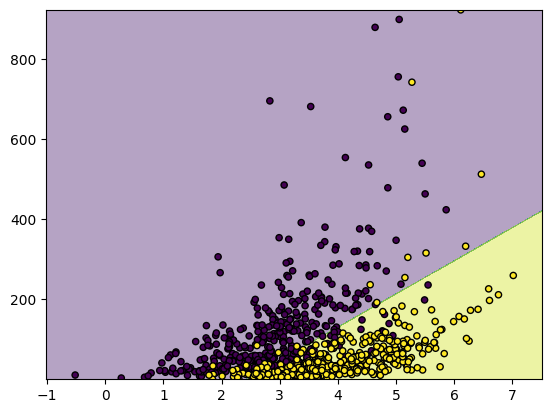

In [5]:
model.plot_decision_boundary(X_train, y_train)

# Test

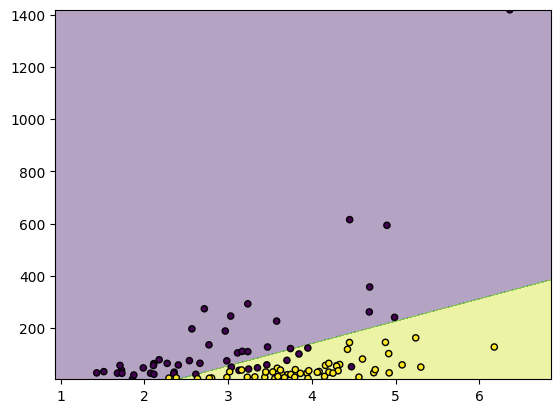

In [6]:
test_data = pd.read_csv('../data/ds1_valid.csv')
X_test, y_test = test_data.iloc[:, :-1].values, test_data.iloc[:, -1].values

model.fit(X_test, y_test)
model.score(X_test, y_test)
model.plot_decision_boundary(X_test, y_test)

In [7]:
# Evaluate
y_pred = model.predict(X_test)

0.888888888888889